In [1]:
#Notebook display setup
%matplotlib inline
from sympy import init_printing, MatAdd, MatMul, Eq
init_printing()

# BondGraphTools Prototype Demonstration
By Peter Cudmore, Systems Biology Lab @ UniMelb
## RLC Example
### Creating Bond Graphs

Bond Graphs are a useful cross-domain modelling toolkit.
It its very simple to programmatically create a bond graph using BondGraphTools.
Here, we create a parallel RLC circuit by creating a new bond graph, adding a linear capacitor, a resistor and an inductor. In order to be able to use this model in simulations or other modules, we add a port to the outside environment.
We also add a common effort component which represents Kirchoffs voltage law, and position this at the origin of the visual representation.

Finally, we add bonds between the common effort component and each component, which completes our bond graph.

In [2]:
from BondGraphTools import BondGraph
bg = BondGraph("RLC")

p = bg.add_component("P")
c = bg.add_component("C")
r = bg.add_component("R")
i = bg.add_component("I")


kvl = bg.add_component("0", pos=(0,0))

bg.add_bond(kvl, c)
bg.add_bond(kvl, r)
bg.add_bond(kvl, i)
bg.add_bond(kvl, p)

### Displaying Bond Graphs

When programatically creating bond graphs, you may choose to specificy the visual co-ordinates of each component (for example; setting `pos=(0,0)` when creating the `kvl` node.

However, if positions are not specified (as in the case of the other components), then there is not yet a visual represntation of the bond graph.

Using the `arrange` function, one can automatically generate a visual representation from a bond graph.
However, as allgorithmically visualising graphs is a hard problem, the effectiveness of these algorithms may vary.

Currently implemented algoprithms include:
 - Simulated Annealing
 - Branch & Bound Search
 - Force-Directed layout
 - (Forthcoming) New metro-map-esq layout

Once a bond graph has been arranged, it can be drawn using the matplotlib transform.
Clearly there is still work to be done so as to produce high-quality graphs.

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


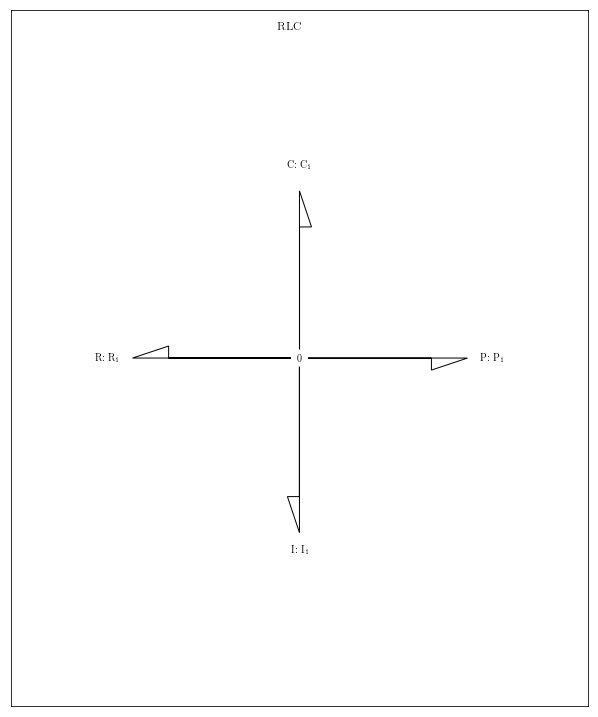

In [3]:
from BondGraphTools.transforms.matplotlib import draw
from BondGraphTools.core.layout_manager import branch_and_bound, arrange

arrange(bg, algorithm=branch_and_bound)
fig = draw(bg)

### Equations

Bond graph models make equation generation and modelling simple.
Once a bond graph has been generated, it can be converted into equations as below.
This produces the differential algebraic equation:
$$A\frac{dx}{dt} + Bx =0$$
$$Jx = 0$$
$$NL(x) = 0$$

Here $J$ is the 'junction' matrix, which represents how all local co-ordinates are related, and $NL$ is a vector field of nonlinear terms (which in this case is zero).

In [4]:
from BondGraphTools.transforms.latex import bondgraph_to_sympy, reduce
dx,x,A,B,J,NL = bondgraph_to_sympy(bg)

NameError: name '_construct_coordinates' is not defined

In [ ]:
# A dx + Bx = 0
Eq(MatAdd(MatMul(A,dx),MatMul(B, x)), 0)

In [ ]:
# Jx = 0
Eq(MatMul(J,x),0)

### Model Reduction

One can project the equations of motion on the the manifold defined by $Jx = 0$ which in this case produces the familiar coupled first order equations for a RLC circuit. Here the linear dynamics in reduced co-ordinates $x_r$ are represented as $L(\dot{x_r}, x_r) = 0$
and the nonlinear terms as $N(\dot{x_r}, x_r) = 0$.

In [ ]:
targets = {xp for xp in x if bg.nodes[p].name in str(xp)}
linear, nonlinear = reduce(dx,x,A,B,J,NL, targets=targets)
linear

In [ ]:
A